IMPORTING NECESSARY LIBRARY AND FUNCTION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,cohen_kappa_score,roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

FILE UPLOADING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
raw_data=pd.read_csv('/content/drive/MyDrive/Data Science/EMAIL SPAM DETECTION/DATA/cleaned_email_message_based.csv')
raw_data
new_data=raw_data
new_data

,spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5566,1,This is the 2nd time we have tried 2 contact u...
5567,0,Will ü b going to esplanade fr home?
5568,0,"Pity, * was in mood for that. So...any other s..."
5569,0,The guy did some bitching but I acted like i'd...


DECLARING X AND Y

In [ ]:
x=new_data['Message']
y=new_data['spam']

FEATURE EXTRACTION PROCEDURE


In [ ]:
vectorizer=TfidfVectorizer(max_df=100,stop_words='english')
vectorized_x=vectorizer.fit_transform(x)

In [ ]:
feature_names=vectorizer.get_feature_names_out()
x=pd.DataFrame(
    data=vectorized_x.toarray(),
    columns=feature_names
)
x

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


SPLITTING X AND Y FOR TRAIN AND TEST

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

LOGISTIC REGRESSION

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
log_prediction=model.predict(x_test)

In [ ]:
print("\n", confusion_matrix(y_test, log_prediction))
print(classification_report(y_test,log_prediction))


 [[985   0]
 [ 57  73]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       985
           1       1.00      0.56      0.72       130

    accuracy                           0.95      1115
   macro avg       0.97      0.78      0.85      1115
weighted avg       0.95      0.95      0.94      1115



--------------------------------------------------------------------------------------------------------------------------------------------------------------

NAIVE BAYES ALGORITHM

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)
nb_prediction=model.predict(x_test)
print("\n", confusion_matrix(y_test,nb_prediction))
print(classification_report(y_test,nb_prediction))


 [[845 140]
 [ 10 120]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       985
           1       0.46      0.92      0.62       130

    accuracy                           0.87      1115
   macro avg       0.72      0.89      0.77      1115
weighted avg       0.93      0.87      0.88      1115



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

SVM

In [ ]:
model=SVC()
model.fit(x_train,y_train)
svm_prediction=model.predict(x_test)
print("\n", confusion_matrix(y_test, svm_prediction))
SVM_cr=classification_report(y_test,svm_prediction)
print(SVM_cr)


 [[985   0]
 [ 33  97]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       985
           1       1.00      0.75      0.85       130

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.97      1115



---------------------------------------------------------------------------------------------------------------------------------------------------------------

RANDOM FOREST

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
rf_prediction=model.predict(x_test)
print("\n", confusion_matrix(y_test, rf_prediction))
print(classification_report(y_test,rf_prediction))


 [[983   2]
 [ 23 107]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       985
           1       0.98      0.82      0.90       130

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115



RANDOM FOREST VISULIZATION


In [ ]:
estimator=model.estimators_[50]
estimator
feature_name=vectorizer.get_feature_names_out()
target_name=new_data['spam'].unique()
target_name=['1','0']

In [ ]:
export_graphviz(estimator, out_file='Random_forest.dot',
                feature_names =feature_name,
                class_names = target_name,
                rounded = True, proportion = False,
                precision = 2, filled = True)
!dot -Tpng Random_forest.dot -o Random_forest.png -Gdpi=200
from IPython.display import Image
Image(filename = 'Random_forest.png')

Output hidden; open in https://colab.research.google.com to view.

----------------------------------------------------------------------------------------------------------------------------------------------------------------



DECISION TREE


In [ ]:
model=DecisionTreeClassifier(max_depth=50, min_samples_split=5, min_samples_leaf=10)
model.fit(x_train,y_train)
dt_prediction=model.predict(x_test)
print("\n", confusion_matrix(y_test, dt_prediction))
print(classification_report(y_test,dt_prediction))


 [[962  23]
 [ 33  97]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       985
           1       0.81      0.75      0.78       130

    accuracy                           0.95      1115
   macro avg       0.89      0.86      0.87      1115
weighted avg       0.95      0.95      0.95      1115



VISULIZATION OF DECISION TREE

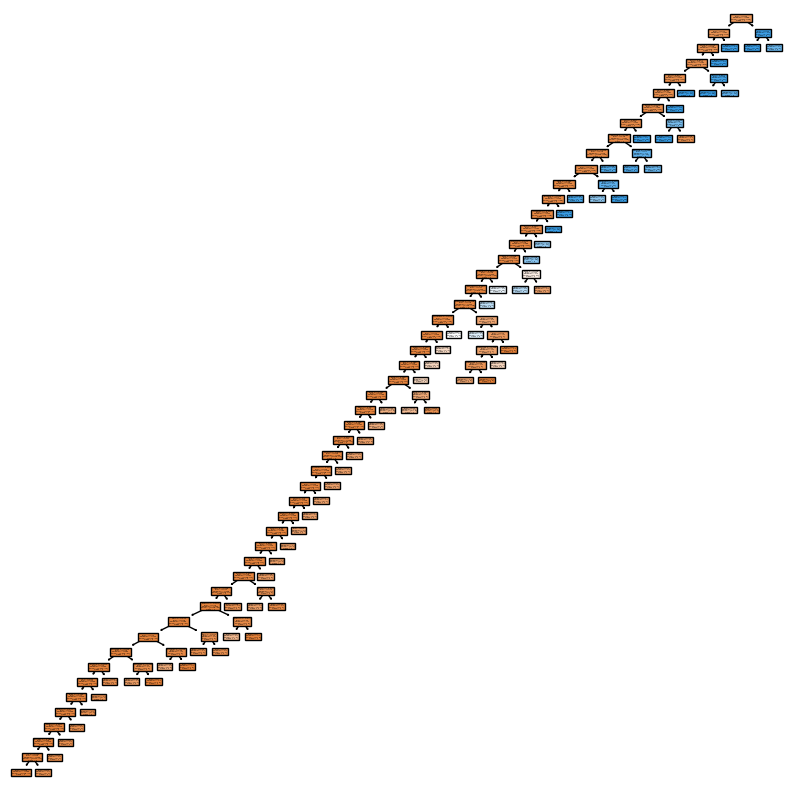

In [ ]:
feature_name=vectorizer.get_feature_names_out()
target_name=new_data['spam'].unique()
target_name=['1','0']
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(model, feature_names = feature_names, class_names = target_name, filled = True, rounded = False)
plt.savefig('tree_visualization.png')

BERT MODEL

In [ ]:
!pip install tensorflow_text
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


bert_x_train,bert_x_test,bert_y_train,bert_y_test=train_test_split(new_data['Message'],new_data['spam'],test_size=0.2)
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model_bert = tf.keras.Model(inputs=[text_input], outputs = [l])
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
]


model_bert.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
history=model_bert.fit(bert_x_train, bert_y_train, epochs=1,batch_size=32,validation_data=(bert_x_test,bert_y_test),verbose=1)
bert_prediction=model.predict(bert_x_test)
bert_prediction=list(np.array(bert_prediction).reshape(-1))
bt_prediction=[1 if(e>=0.5) else 0 for e in bert_prediction]

35/35 [==============================] - 570s 16s/step


In [ ]:
print("\n", confusion_matrix(y_test, bt_prediction))
print(classification_report(y_test,bt_prediction))


 [[  2 950]
 [  0 163]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       952
           1       0.15      1.00      0.26       163

    accuracy                           0.15      1115
   macro avg       0.57      0.50      0.13      1115
weighted avg       0.88      0.15      0.04      1115



COMPARISON

In [ ]:
from sklearn.metrics import f1_score
metric={
    "logistic regression":{
         "Precision": precision_score(y_test, log_prediction),
        "Recall": recall_score(y_test,log_prediction),
        "F1-score": f1_score(y_test,log_prediction),
        "Accuracy":accuracy_score(y_test,log_prediction),
         "kappa":cohen_kappa_score(y_test,log_prediction)
    },
    "SVM": {
        "Precision": precision_score(y_test, svm_prediction),
        "Recall": recall_score(y_test,svm_prediction),
        "F1-score": f1_score(y_test, svm_prediction),
        "Accuracy":accuracy_score(y_test,svm_prediction),
        "kappa":cohen_kappa_score(y_test,svm_prediction)
    },
    "Naive Bayes": {
        "Precision": precision_score(y_test, nb_prediction),
        "Recall": recall_score(y_test, nb_prediction),
        "F1-score": f1_score(y_test, nb_prediction),
        "Accuracy":accuracy_score(y_test,nb_prediction),
        "kappa":cohen_kappa_score(y_test,nb_prediction)
    },
    "Decision Tree": {
        "Precision": precision_score(y_test, dt_prediction),
        "Recall": recall_score(y_test, dt_prediction),
        "F1-score": f1_score(y_test, dt_prediction),
        "Accuracy":accuracy_score(y_test,dt_prediction),
        "kappa":cohen_kappa_score(y_test,dt_prediction)
    },
    "Random Forest": {
        "Precision": precision_score(y_test, rf_prediction),
        "Recall": recall_score(y_test, rf_prediction),
        "F1-score": f1_score(y_test, rf_prediction),
        "Accuracy":accuracy_score(y_test,rf_prediction),
        "kappa":cohen_kappa_score(y_test,rf_prediction)
    },
    "BERT":{
        "Precision": precision_score(bert_y_test, bt_prediction),
        "Recall": recall_score(bert_y_test, bt_prediction),
        "F1-score": f1_score(bert_y_test, bt_prediction),
        "Accuracy":accuracy_score(bert_y_test,bt_prediction),
        "kappa":cohen_kappa_score(bert_y_test,bt_prediction)
    }
}

In [ ]:
precision=[]
recall=[]
f1_score=[]
accuracy=[]
kappa=[]
for e in metric.keys():
  precision.append(metric[e]['Precision'])
  recall.append(metric[e]['Recall'])
  f1_score.append(metric[e]['F1-score'])
  accuracy.append(metric[e]['Accuracy'])
  kappa.append(metric[e]['kappa'])
precision

[1.0,
 1.0,
 0.46153846153846156,
 0.8083333333333333,
 0.981651376146789,
 0.14285714285714285]

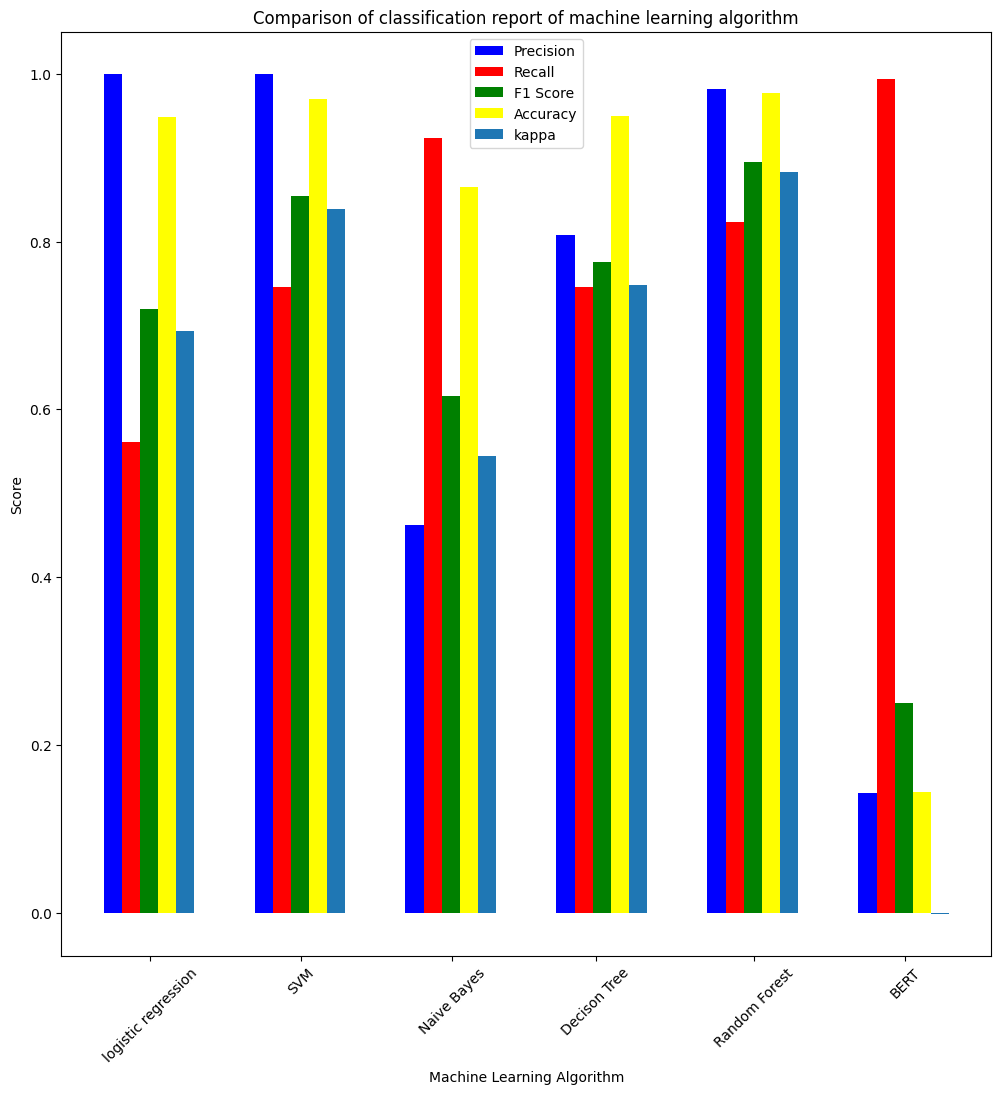

In [ ]:
r1=np.arange(6)
barwidth=0.12
r2=r1+barwidth
r3=r1+2*barwidth
r4=r1+3*barwidth
r5=r1+4*barwidth
plt.figure(figsize=(12, 12))
plt.bar(r1,precision,width=barwidth,label='Precision',color='blue')
plt.bar(r2,recall,width=barwidth,label='Recall',color='red')
plt.bar(r3,f1_score,width=barwidth,label='F1 Score',color='green')
plt.bar(r4,accuracy,width=barwidth,label='Accuracy',color='yellow')
plt.bar(r5,kappa,width=barwidth,label='kappa')
plt.title("Comparison of classification report of machine learning algorithm")
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Score")
plt.xticks([0.25,1.25,2.25,3.2,4.25,5.25],['logistic regression','SVM','Naive Bayes','Decison Tree','Random Forest','BERT'],rotation=45)
plt.legend()
plt.show()


Text(0.5, 1.0, 'Area under curve of ML algorithms')

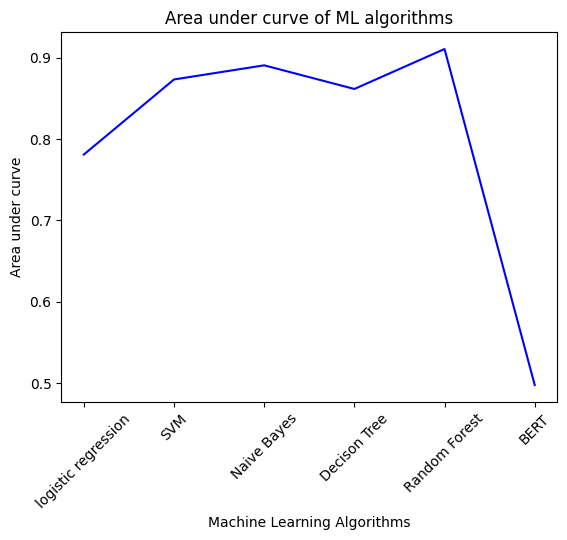

In [ ]:
fpr1, tpr1,_ = roc_curve(y_test, log_prediction)
fpr2,tpr2,_=roc_curve(y_test,svm_prediction)
fpr3,tpr3,_=roc_curve(y_test,nb_prediction)
fpr4,tpr4,_=roc_curve(y_test,dt_prediction)
fpr5,tpr5,_=roc_curve(y_test,rf_prediction)
fpr6,tpr6,_=roc_curve(bert_y_test,bt_prediction)
area=[]
area.append(auc(fpr1,tpr1))
area.append(auc(fpr2,tpr2))
area.append(auc(fpr3,tpr3))
area.append(auc(fpr4,tpr4))
area.append(auc(fpr5,tpr5))
area.append(auc(fpr6,tpr6))
plt.plot(np.arange(1,7),area,color='blue')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Area under curve')
plt.xticks([1,2,3,4,5,6],['logistic regression','SVM','Naive Bayes','Decison Tree','Random Forest','BERT'],rotation=45)
plt.title("Area under curve of ML algorithms")